In [1]:
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import OrderedDict

matplotlib.rcParams['ps.useafm'] = True
matplotlib.rcParams['pdf.use14corefonts'] = True
matplotlib.rcParams['text.usetex'] = True

In [2]:
color_list = sns.color_palette()
line_style = ['--', ':', '-']

class plot_figure(object):
    def __init__(self, algo_name, dir, sub_sample=1, log_flag_ = False):
        self.sub_sample = sub_sample
        self.dir = dir
        self.algo_name = algo_name
        self.log_flag = log_flag_

        self.num_trails, self.res, self.xvals = self.load_data(algo_name)
        self.z = 1.96/np.sqrt(self.num_trails) # 95% confidence， 1.645-90%
        

    def load_data(self, algo_name):
        """从指定的数据文件中加载plot数据"""

        file = [f for f in os.listdir(self.dir) if algo_name in f]
        # 读取这些文件的数据
        files = [np.load(os.path.join(self.dir, f), allow_pickle=True) for f in file]
        # 读取measurement, i.e., consensus error, mean square error
        res = np.array([f.item().get("gap") for f in files])
        res = res ** 2

        # 读取数据横坐标
        xvals = files[0].item().get('iter')

        
        message = f"""
        检查到有{len(res)}个数据文件: {file[:]} ...
        每个文件中gap list的长度有: {[len(r) for r in res]}
        """
        if self.log_flag:
            print(message)

        return len(file), res, xvals

    def plot_lines(self, color, line='-', label=''):
        mean = np.mean(self.res, axis = 0)
        std = np.std(self.res, axis = 0)

        lb = mean - self.z * std
        ub = mean + self.z * std

        plt.plot( self.xvals[0::self.sub_sample], mean[0::self.sub_sample], label=label, color=color, lw=1.2, linestyle = line)
        plt.fill_between(self.xvals, lb, ub, color=color, alpha=.05)

        plt.ticklabel_format(axis = 'x', style='sci')
        plt.ticklabel_format(axis='y', style='sci')
        plt.legend(loc=3, prop={'size': 14})
        plt.xlabel(r"Iterations $t$", fontsize=18)
        # plt.ylim([1e0, 1e1])


        检查到有5个数据文件: ['DFO-lambda1-rep7.npy', 'DFO-lambda1-rep6.npy', 'DFO-lambda1-rep5.npy', 'DFO-lambda1-rep8.npy', 'DFO-lambda1-rep9.npy'] ...
        每个文件中gap list的长度有: [1524, 1524, 1524, 1524, 1524]
        

        检查到有5个数据文件: ['DFO-lambda0.75-rep7.npy', 'DFO-lambda0.75-rep6.npy', 'DFO-lambda0.75-rep5.npy', 'DFO-lambda0.75-rep8.npy', 'DFO-lambda0.75-rep9.npy'] ...
        每个文件中gap list的长度有: [1524, 1524, 1524, 1524, 1524]
        


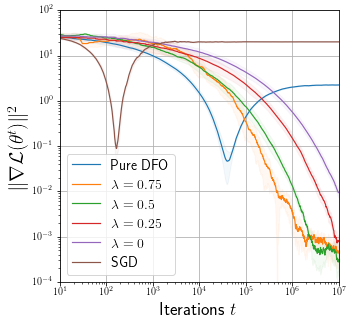

In [7]:
fig = plt.figure(figsize=(5,5))

log_flag = True
path = './res-new'

plot_instance = plot_figure(algo_name='DFO-lambda1-', dir=path, log_flag_=log_flag)
plot_instance.plot_lines(color_list[0], label=r'Pure DFO')

plot_instance = plot_figure(algo_name='DFO-lambda0.75-', dir=path, log_flag_=log_flag)
plot_instance.plot_lines(color_list[1], label=r'$\lambda=0.75$')

plot_instance = plot_figure(algo_name='DFO-lambda0.5-', dir=path)
plot_instance.plot_lines(color_list[2], label=r'$\lambda=0.5$')

plot_instance = plot_figure(algo_name='DFO-lambda0.25-', dir=path)
plot_instance.plot_lines(color_list[3], label=r'$\lambda=0.25$')

plot_instance = plot_figure(algo_name='DFO-lambda0-', dir=path)
plot_instance.plot_lines(color_list[4], label=r'$\lambda=0$')

plot_instance = plot_figure(algo_name='RGD', dir=path)
plot_instance.plot_lines(color_list[5], label='SGD')

plt.ylabel(r"$\|\nabla {\cal L}(\theta^t)\|^2$", fontsize = 20)

plt.yscale('log')
plt.xlim([1e1, 1e7])
plt.ylim([1e-4, 1e2])

plt.xscale('log')
plt.grid()
plt.show()


In [4]:
sigmoid == tanh(x)

randomness: floor(rand(0,1, batch=12)*num_dataset)

NameError: name 'sigmoid' is not defined